In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Title

In [2]:
raw_data = pd.read_csv("KaggleV2-May-2016.csv")
print("Rows: {}\nColumns: {}".format(raw_data.shape[0], raw_data.shape[1]))
raw_data.head()

Rows: 110527
Columns: 14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
raw_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### No-show: the prediction target

In [5]:
raw_data["No-show"].describe()

count     110527
unique         2
top           No
freq       88208
Name: No-show, dtype: object

In [6]:
raw_data["No-show"].value_counts(normalize=True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

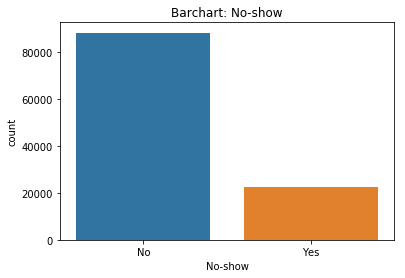

In [7]:
s = sns.countplot("No-show", data=raw_data)
s.set_title("Barchart: No-show")
plt.show()

### Gender

In [8]:
raw_data["Gender"].describe()

count     110527
unique         2
top            F
freq       71840
Name: Gender, dtype: object

In [9]:
raw_data["Gender"].value_counts(normalize=True)

F    0.649977
M    0.350023
Name: Gender, dtype: float64

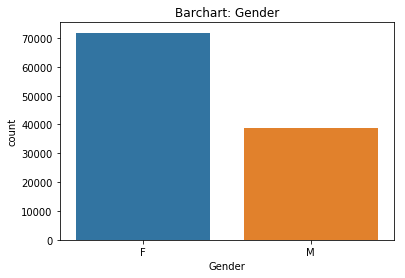

In [10]:
s = sns.countplot("Gender", data=raw_data)
s.set_title("Barchart: Gender")
plt.show()

### Age

In [11]:
raw_data["Age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [12]:
raw_data["Age"].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

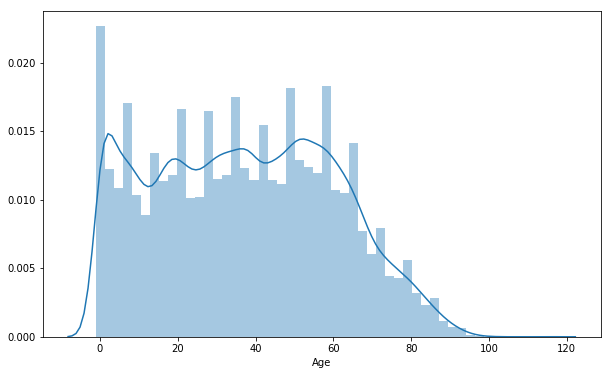

In [13]:
fig = plt.figure(figsize=(10, 6))
s = sns.distplot(raw_data["Age"])
plt.show()

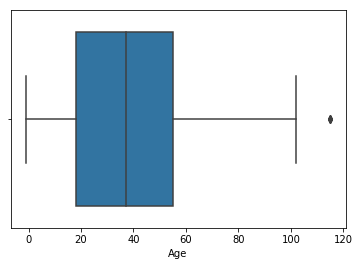

In [14]:
sns.boxplot(x="Age", data=raw_data)
plt.show()

### Neighbourhood

In [15]:
raw_data["Neighbourhood"].describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object

In [16]:
raw_data["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

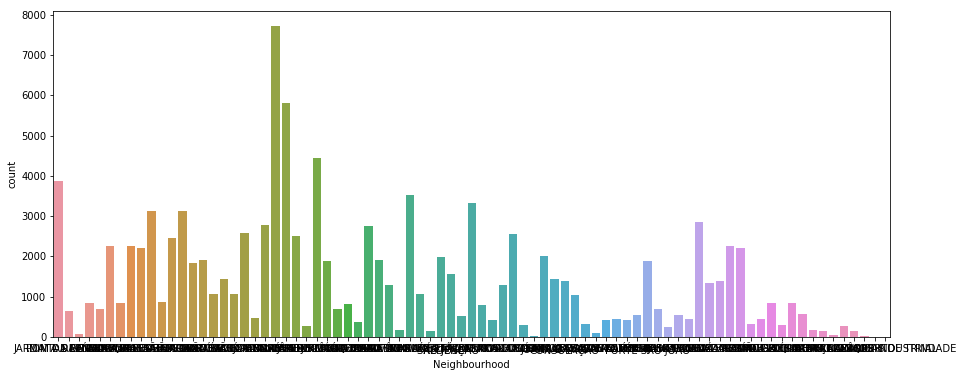

In [17]:
fig = plt.figure(figsize=(15, 6))
s = sns.countplot("Neighbourhood", data=raw_data)
plt.show()

### Scholarship

In [18]:
raw_data["Scholarship"].describe()

count    110527.000000
mean          0.098266
std           0.297675
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64

In [19]:
raw_data["Scholarship"].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

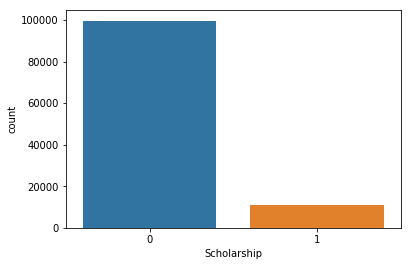

In [20]:
s = sns.countplot("Scholarship", data=raw_data)
plt.show()

### Hipertension

In [21]:
raw_data["Hipertension"].describe()

count    110527.000000
mean          0.197246
std           0.397921
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Hipertension, dtype: float64

In [22]:
raw_data["Hipertension"].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

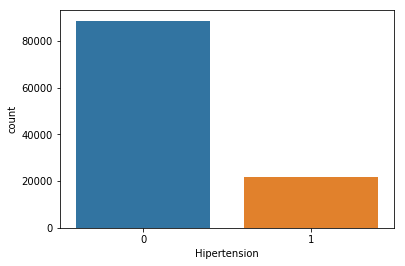

In [23]:
s = sns.countplot("Hipertension", data=raw_data)
plt.show()